In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Ucitavanje skupa podataka 

In [3]:
def make_dataset(filepath):
    df = pd.read_csv(filepath,delimiter = ';', header = None)
    df.columns = ['Text', 'Emotion']
    return df
    

In [24]:
dataset = make_dataset('../dataset/train.txt')

In [25]:
pd.options.display.max_colwidth = 1000
dataset.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


In [26]:
dataset['Emotion'].unique()
#imamo 6 razlicith emocija

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [27]:
rows,columns = dataset.shape
print(f'Num of rows: {rows}')
print(f'Num of columns: {columns}')
print(f'The dataset has the following attribute names: {list(dataset.columns)}')

Num of rows: 16000
Num of columns: 2
The dataset has the following attribute names: ['Text', 'Emotion']


In [28]:
def pie_chart(dataframe, title):
  counts = dataframe['Emotion'].value_counts()

  spacing = 1.01
  wedgeprops = {'width': spacing, 'edgecolor': 'w'}
  colors = ['#f58c8c', '#cd5f5f', '#6342bb','#c55083','#2698d3','#47b39c']
  counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', wedgeprops=wedgeprops)
  plt.title(title)
  plt.ylabel('')
  plt.show()



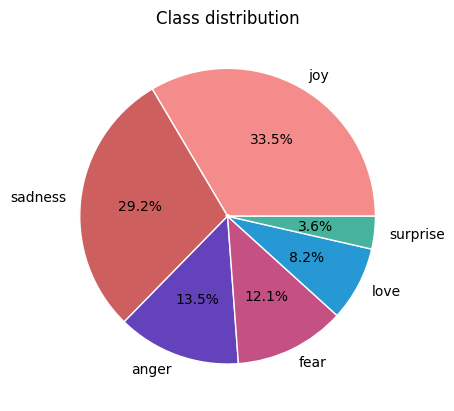

In [34]:
pie_chart(dataset,"Class distribution")

In [18]:
#primecujemo da je vecina instanci iz 2 klase

# Outlieri

Text(0.5, 1.0, 'Surprise')

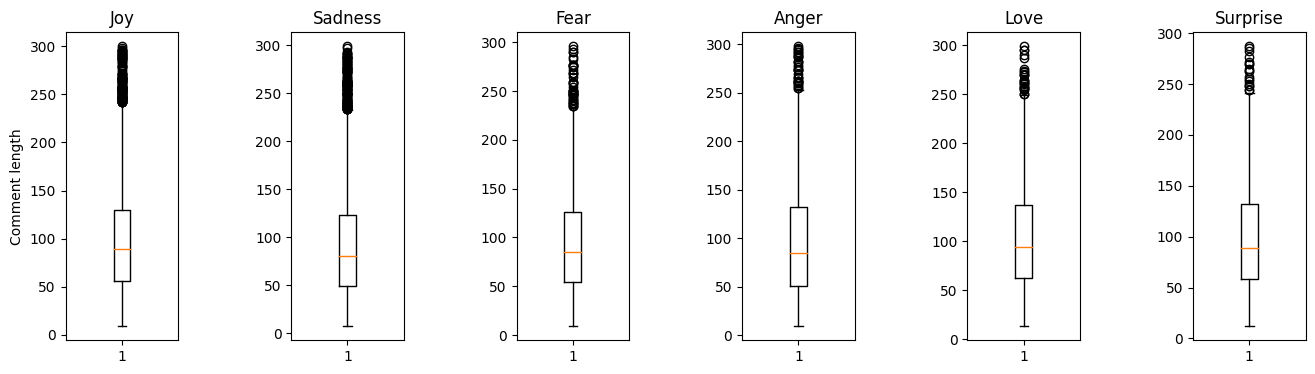

In [39]:
tweets = dataset['Text']
emotions = dataset['Emotion']

tweet_lengths = tweets.str.len()

lengths_joy = sorted(tweet_lengths[emotions == 'joy'])
lengths_sadness = sorted(tweet_lengths[emotions == 'sadness'])
lengths_fear= sorted(tweet_lengths[emotions == 'fear'])
lengths_anger = sorted(tweet_lengths[emotions == 'anger'])
lengths_love = sorted(tweet_lengths[emotions == 'love'])
lengths_surprise = sorted(tweet_lengths[emotions == 'surprise'])


fig,axes = plt.subplots(nrows = 1, ncols = 6,figsize = (16,4))
plt.subplots_adjust(wspace = 1)

plt.subplot(1,6,1)
plt.boxplot(lengths_joy)
plt.title('Joy')
plt.ylabel('Comment length')

plt.subplot(1,6,2)
plt.boxplot(lengths_sadness)
plt.title('Sadness')

plt.subplot(1,6,3)
plt.boxplot(lengths_fear)
plt.title('Fear')

plt.subplot(1,6,4)
plt.boxplot(lengths_anger)
plt.title('Anger')

plt.subplot(1,6,5)
plt.boxplot(lengths_love)
plt.title('Love')

plt.subplot(1,6,6)
plt.boxplot(lengths_surprise)
plt.title('Surprise')

In [42]:
import statistics
print(statistics.mean(lengths_joy))

98.5544572920552


In [44]:
print(max(tweets))

while cycling in the country
